In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy.optimize import brentq
from scipy import integrate

l, L, Vo = 1.0, 5.0, 1.5 # angular momentum, potential width, potential value
x_max = 3*L # maximum value of x (the choice depends of the value of L)
h = 0.0001 # step value for solve the ode
e = 0.01 # step value for energies of the eigenstates
N = int(x_max/h) # number of iterations
u = np.zeros(N,dtype="double") # change of variable radial part wave function g, so that u=g*r
u[0], u[1] = 0, h # initial conditions


def V(x,E):
    # (minus) effective potential function
    if (x > L):
        return -E**2+1+l*(l+1)/x**2
    else:
        if (x == 0):
            return -(E+Vo)**2+1+l*(l+1)/h**4
        else:
            return -(E+Vo)**2+1+l*(l+1)/x**2

def wavef(E):
    # calculates the u(x_max)
    for i in range(1, N-1):
        u[i+1] = (2 * (1 + 5 * (h**2) * V(i*h, E)/12) * u[i] - (1 - (h**2) * V((i-1)*h, E)/12) * u[i-1])/(1 - (h**2) * V((i+1) * h, E)/12)
    return u[-1]

def find_E_levels(energies, u_max):
    # find all zeroes in u(x_max) = 0
    zeroes = []
    s = np.sign(u_max)
    for i in range(len(u_max)-1):
        if (s[i]+s[i+1] == 0): #sign change
            zero = brentq(wavef, energies[i], energies[i+1])
            zeroes.append(zero)
    return zeroes

    

The energies of the bound states are: 
1 . E = -0.2402
g(x_max): -7.504818482265658e-10
Norm -> 1.0
2 . E = 0.1861
g(x_max): -2.7490709243593538e-09
Norm -> 1.0
3 . E = 0.6832
g(x_max): 2.0986823914817286e-10
Norm -> 1.0000000000000002


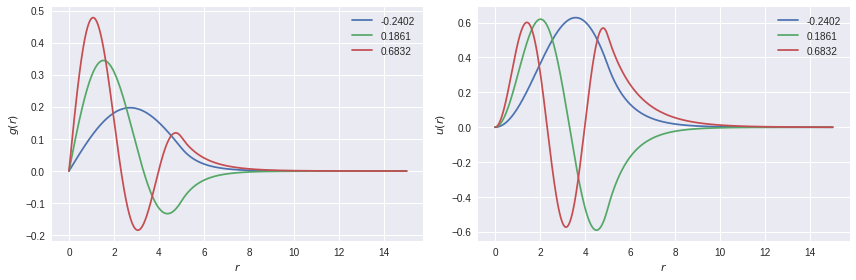

In [2]:
energies = np.linspace(-1, 1, int(2/e)) # vector of energies where we look for the stable states
u_max = []  # vector for values of the wave function at x_max

for E in energies:
    u_max.append(wavef(E)) # for each energy find the u at x_max

E_levels = find_E_levels(energies, u_max)

# plotting the wavefunctions for the eigenstates
x = np.linspace(0, x_max, N)
y = np.zeros(N)
y[0] = 1/(h**2)
for i in range(1, N):
    y[i] = 1/x[i]
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
print ("The energies of the bound states are: ")

i = 1
for E in E_levels:
    print (i, ". E =", "%.4f"%E)
    i = i + 1
    wavef(E)
    norm = np.sqrt(integrate.simps(u**2, x)) # finding normalization factor
    u_norm = u/norm
    g = np.multiply(u_norm, y) # recovering the radial part g=u/r
    g[0] = g[1]
    print("g(x_max):", g[-1])
    print ("Norm ->", integrate.simps(u_norm**2, x))
    ax1.plot(x, g, label="%.4f"%E)
    ax2.plot(x, u_norm, label="%.4f"%E)
    
ax1.set_xlabel('$r$')
ax1.set_ylabel('$g(r)$')
ax1.legend(loc="upper right")
ax2.set_xlabel('$r$')
ax2.set_ylabel('$u(r)$')
ax2.legend(loc="upper right")

plt.tight_layout()
plt.savefig('wavefunction.pdf')
plt.show()